1.Import packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
import sase1d

2.Input parameters

In [19]:
#same parameters
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 200#31                        # n-sample points along bunch length
z_steps = 200#20                        # n-sample points along undulator
energy  = 4313.34                   # electron energy [MeV]
eSpread = 0#1.0e-4                    # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [mm-mrad]
currentMax = 3900                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduK = 3.5                         # undulator parameter, K [ ]
unduL = 25#30                          # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 10000*0.0                       # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No

In [6]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 200                       # n-sample points along bunch length
z_steps = 200                        # n-sample points along undulator
energy  = 4313.34                   # electron energy [MeV]
eSpread = 0#1.0e-4                    # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [mm-mrad]
currentMax = 3900                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduK = 3.5                         # undulator parameter, K [ ]
unduL = 70                          # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 10000*0.0                       # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No

In [20]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed}

3.1D FEL run

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
bunchLength 1.2499933381812969e-06
gbar -5.329454962384554e-06
delt 0.125


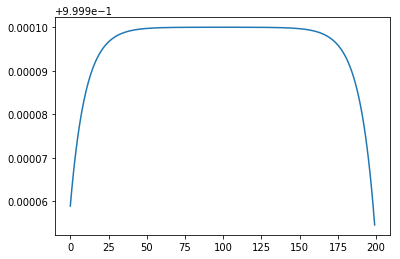

In [21]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,gam_out,bunching,history=sase1d.sase(inp_struct)

4.Print or plot the output

/Users/xiao/Desktop/data/RL/local_test/General_test/sase1d.py:180: RuntimeWarning: divide by zero encountered in log
  plt.plot(z,np.log(power_z))
/Users/xiao/miniconda3/envs/cs231n/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


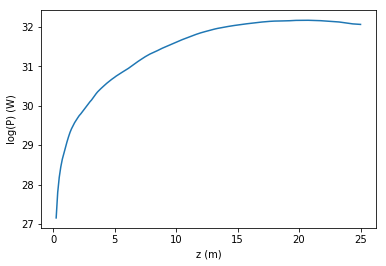

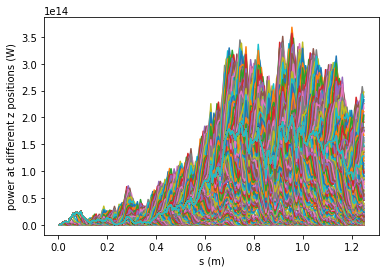

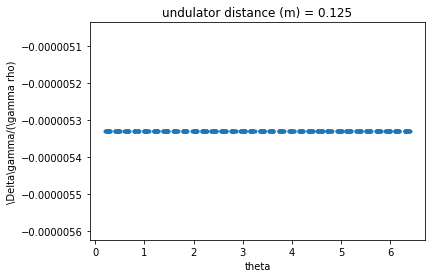

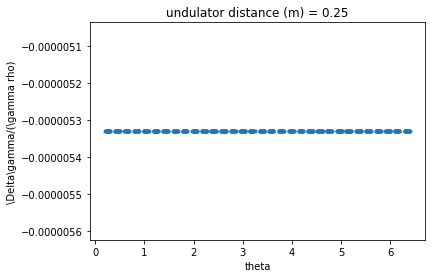

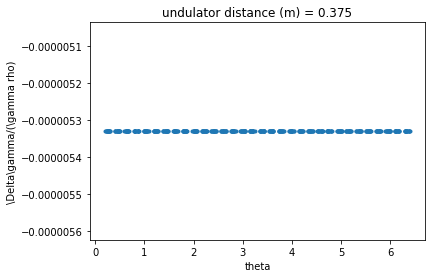

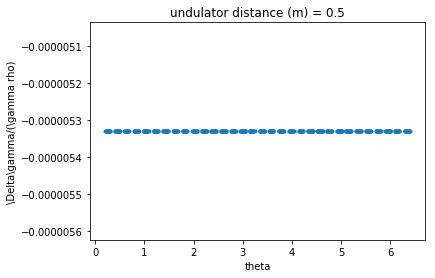

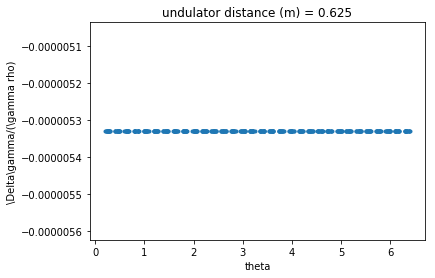

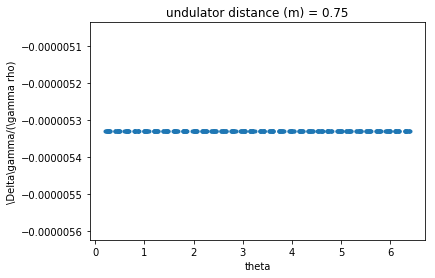

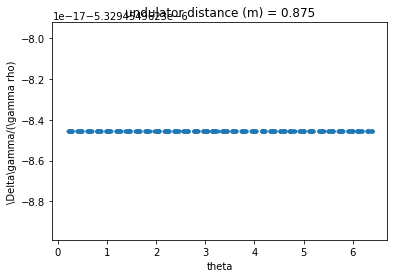

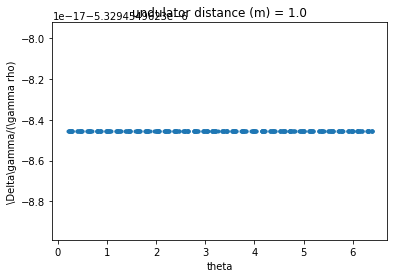

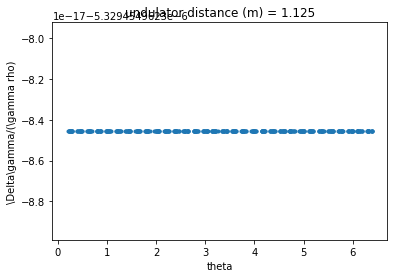

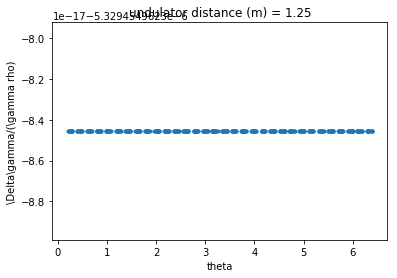

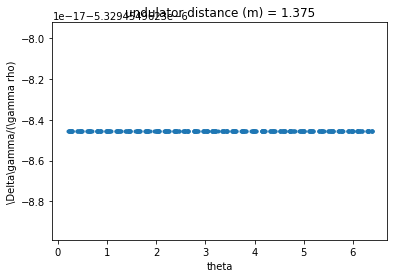

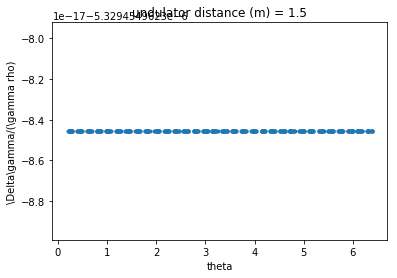

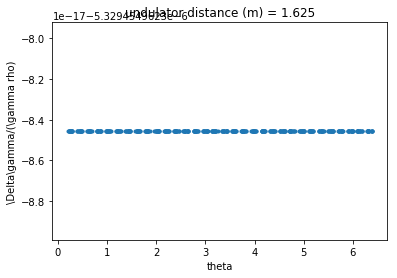

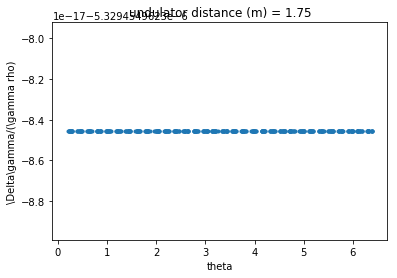

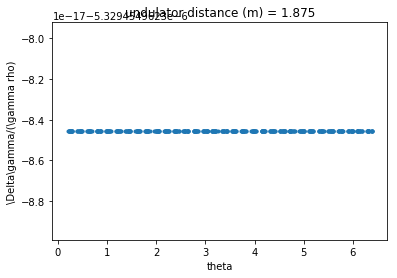

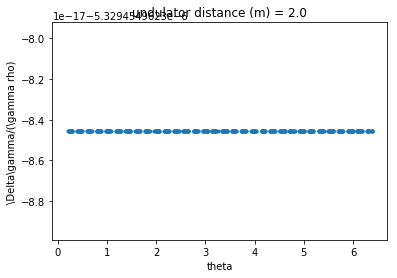

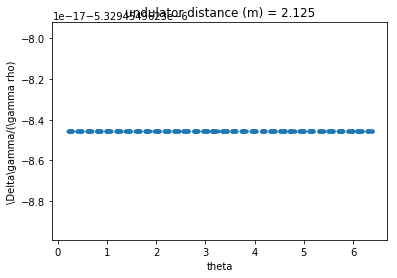

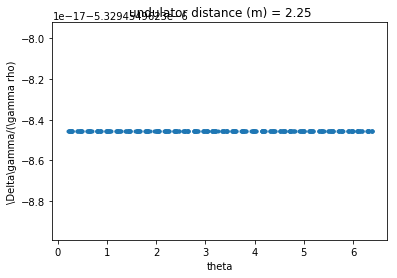

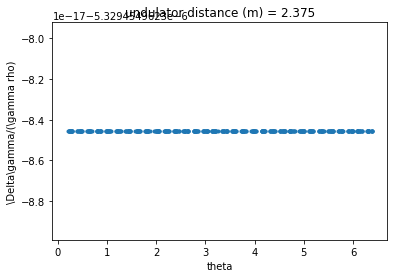

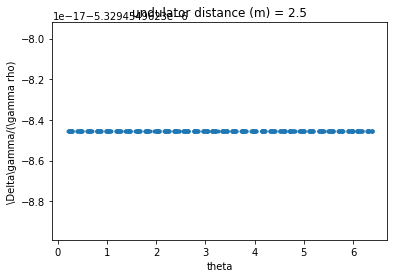

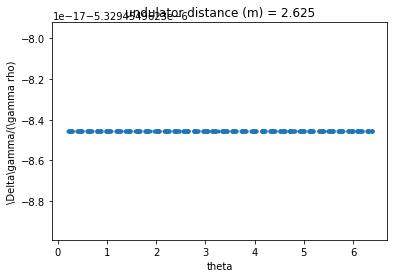

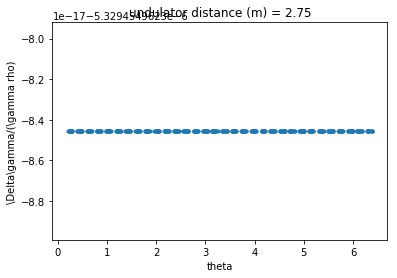

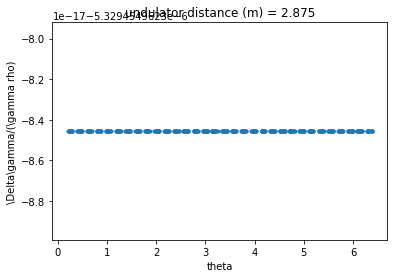

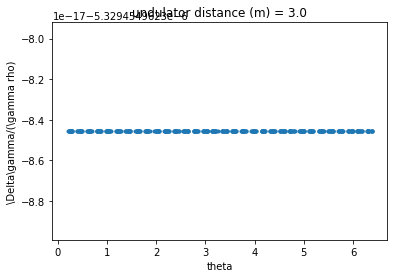

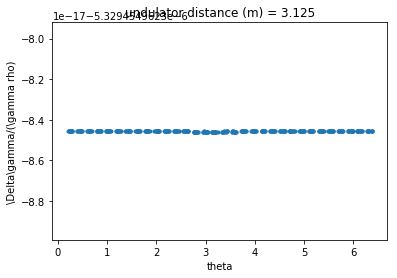

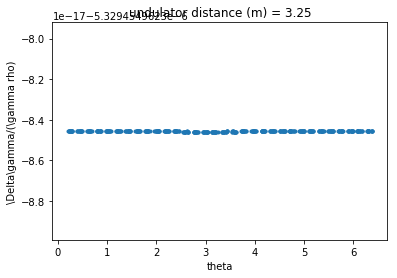

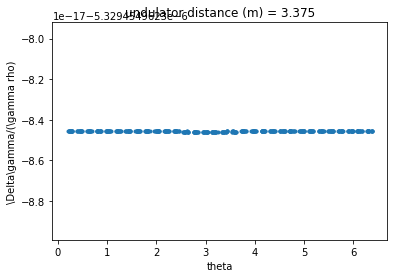

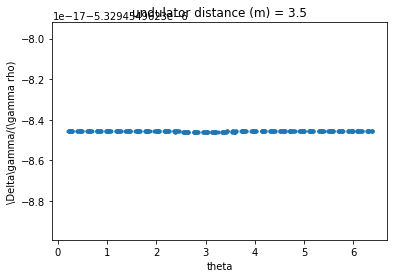

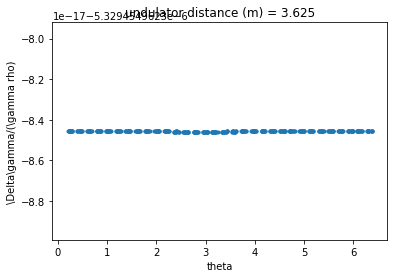

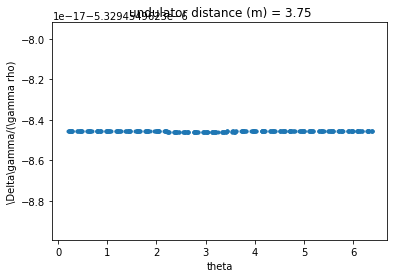

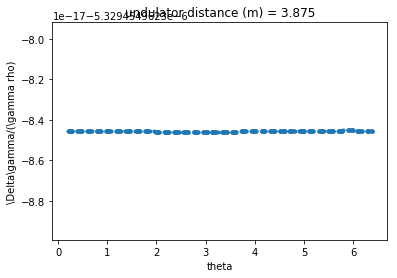

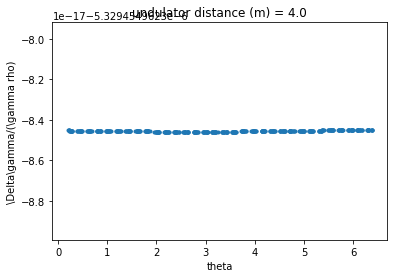

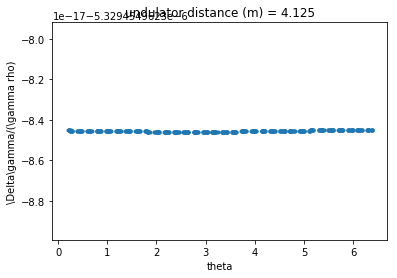

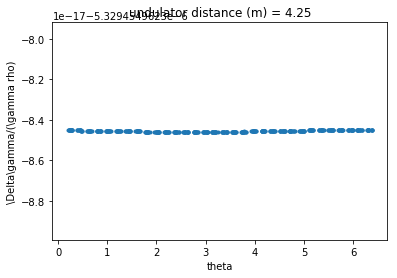

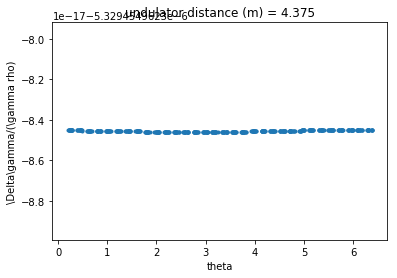

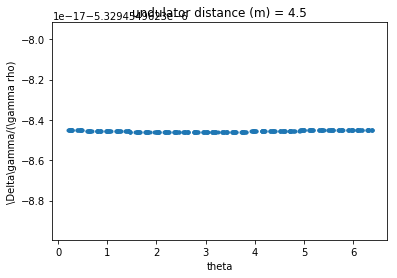

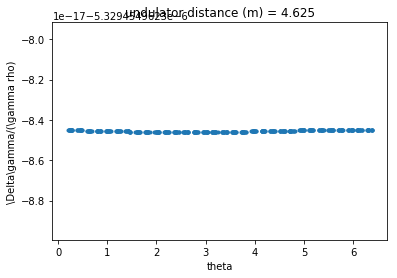

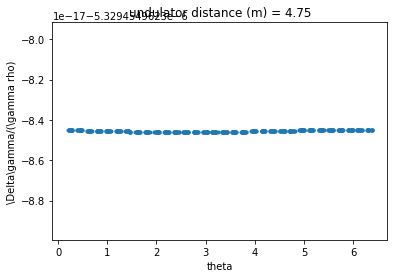

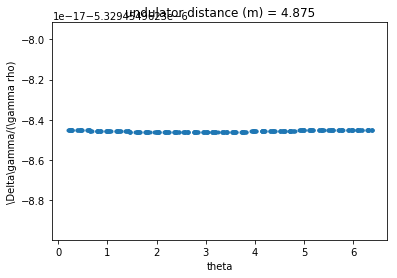

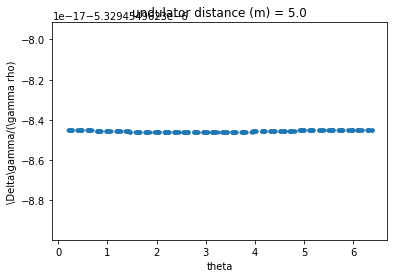

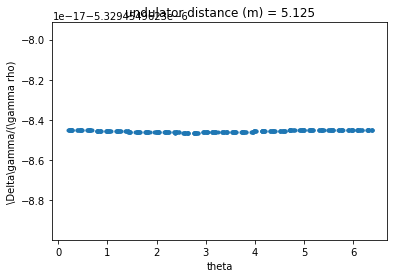

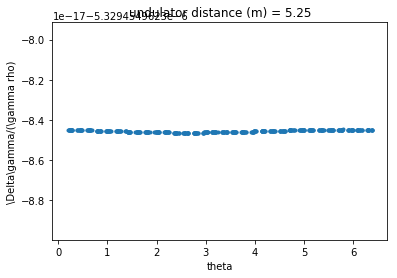

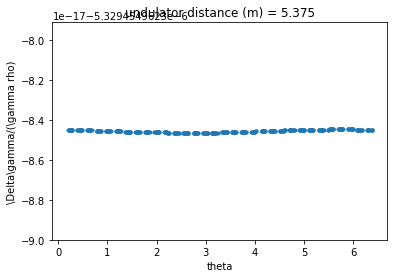

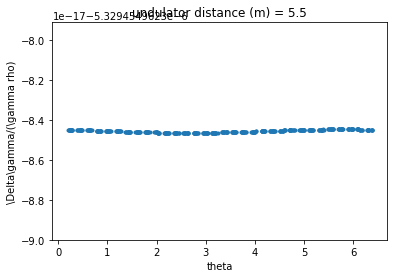

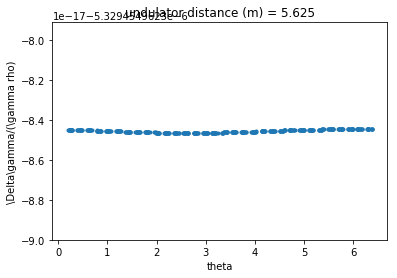

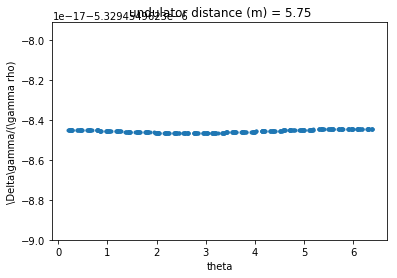

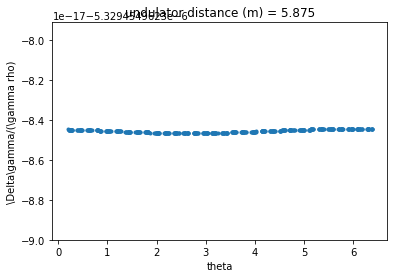

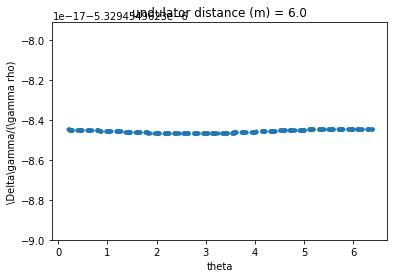

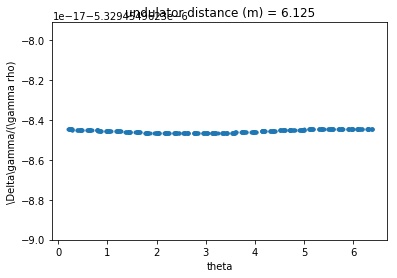

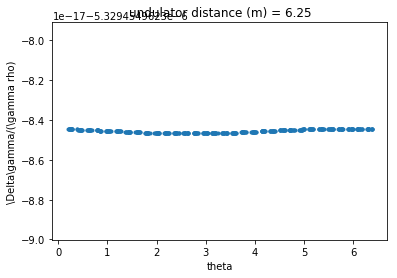

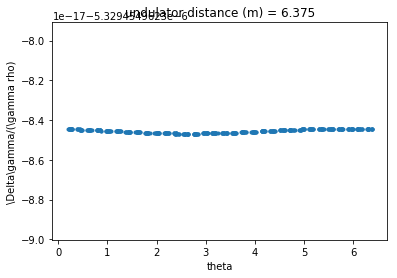

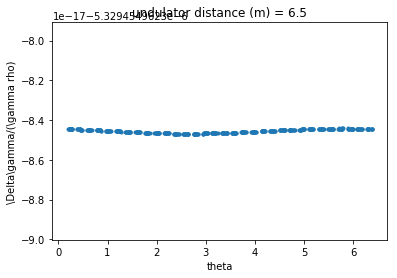

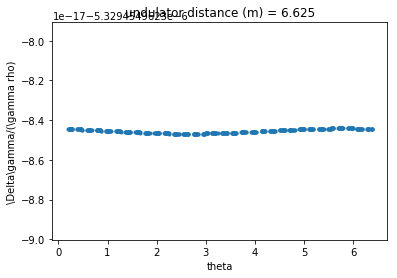

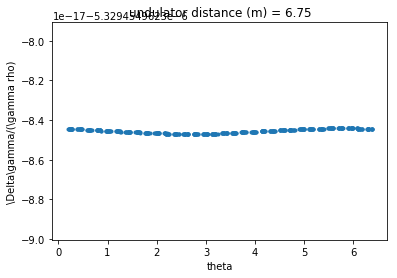

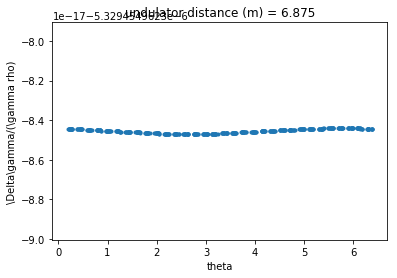

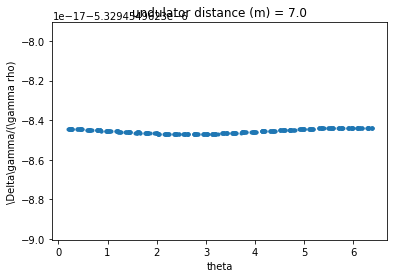

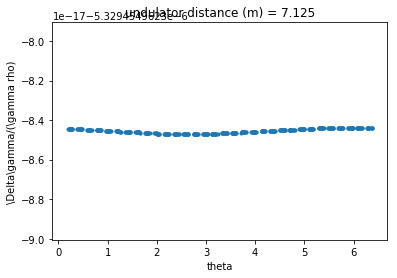

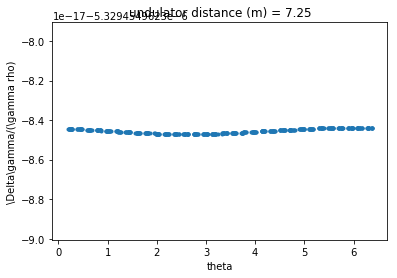

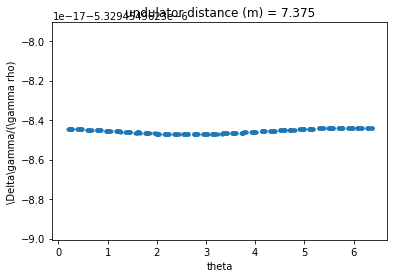

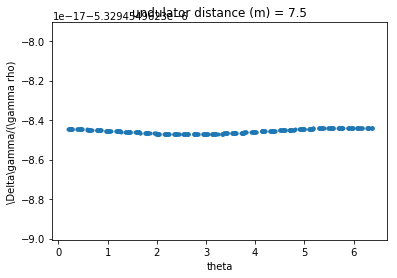

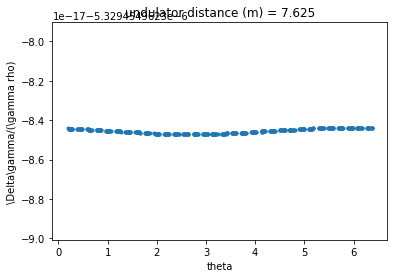

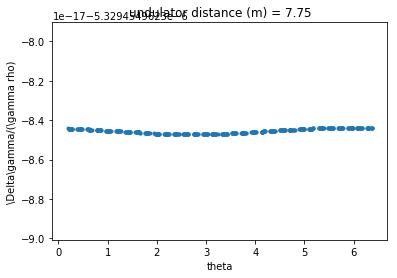

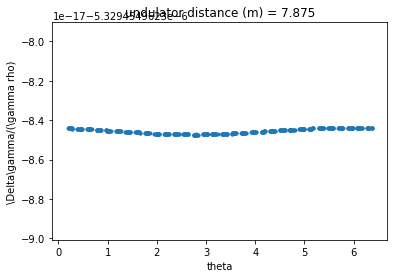

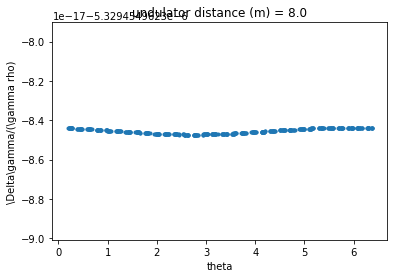

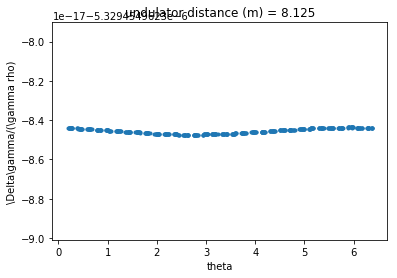

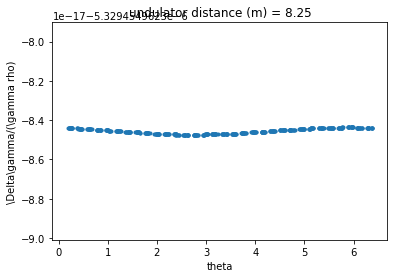

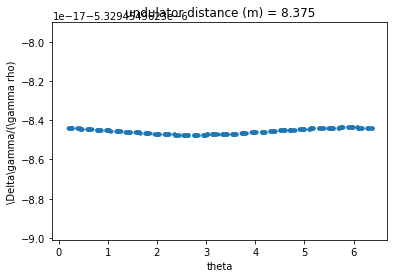

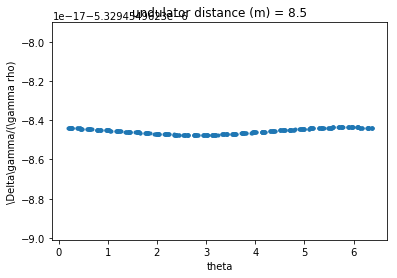

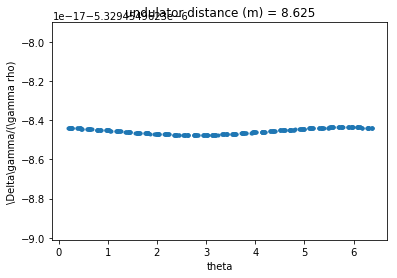

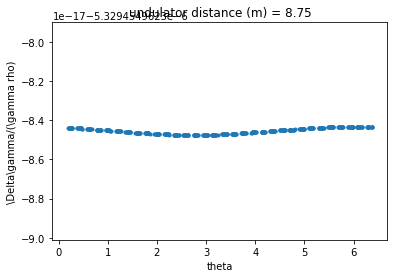

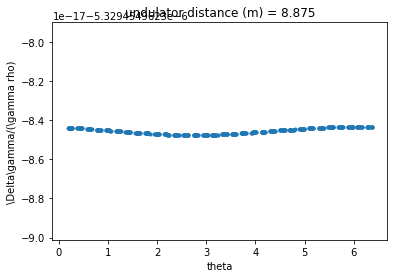

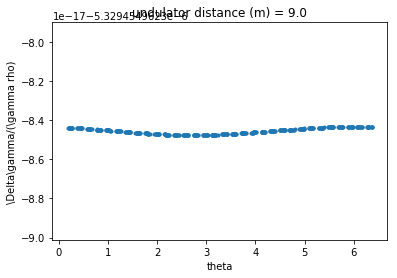

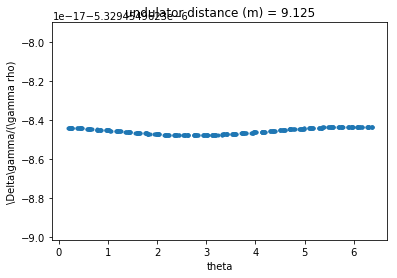

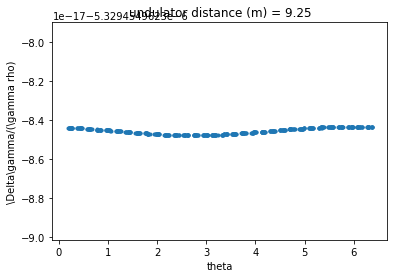

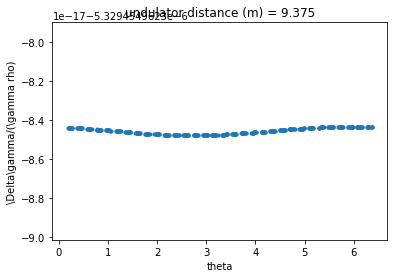

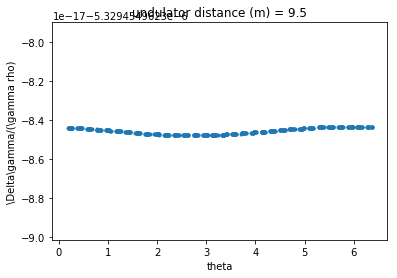

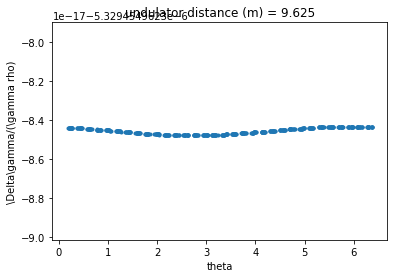

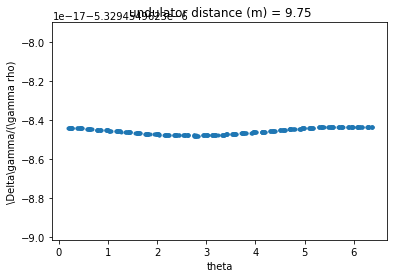

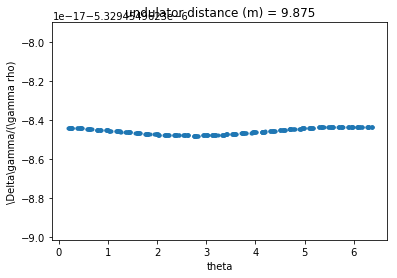

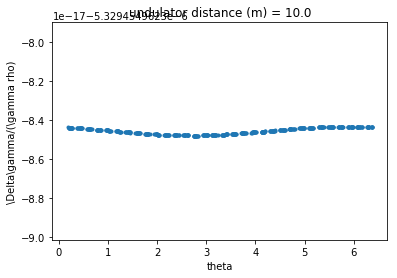

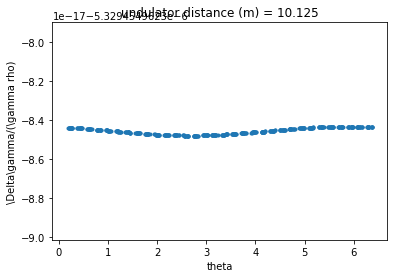

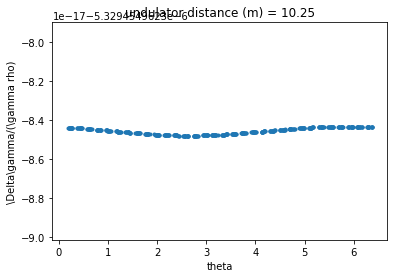

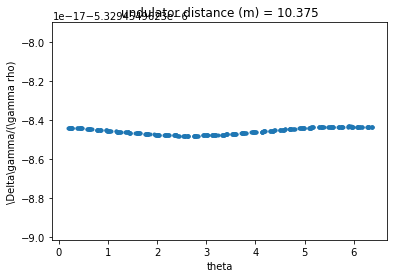

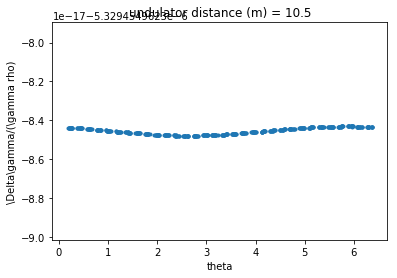

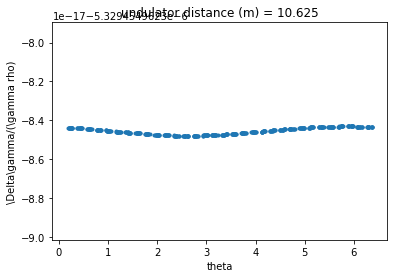

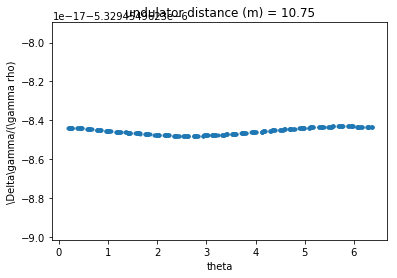

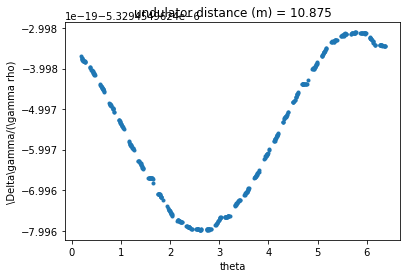

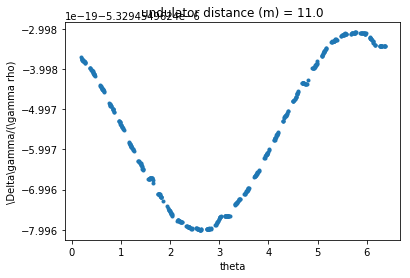

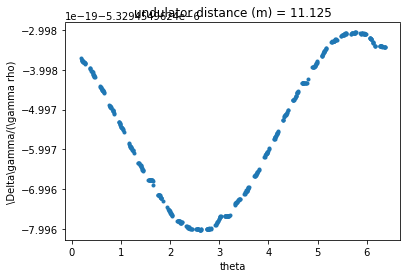

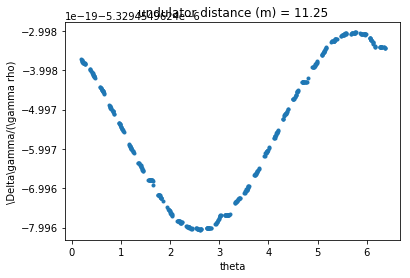

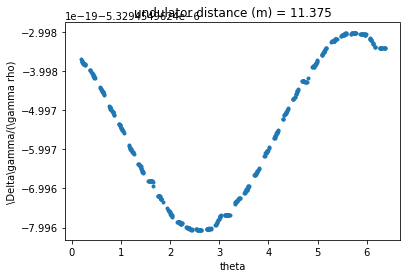

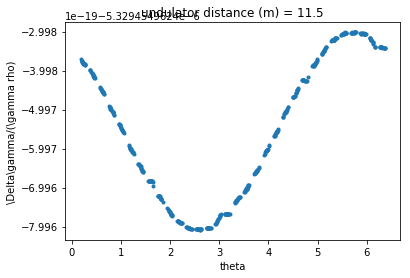

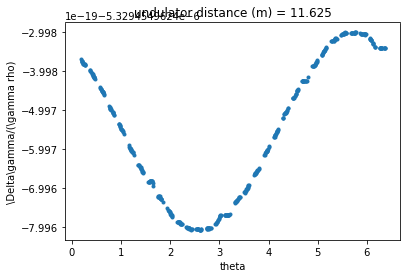

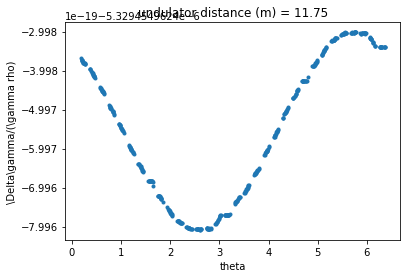

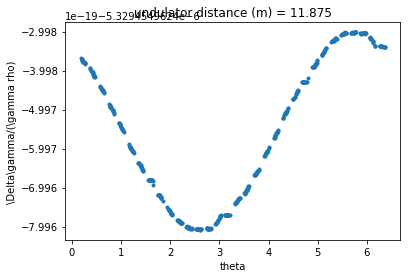

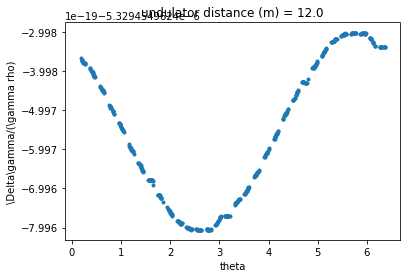

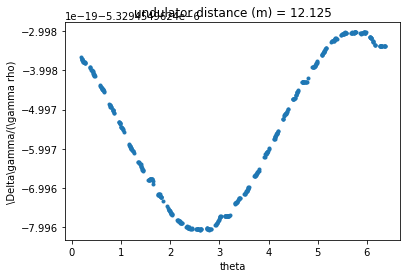

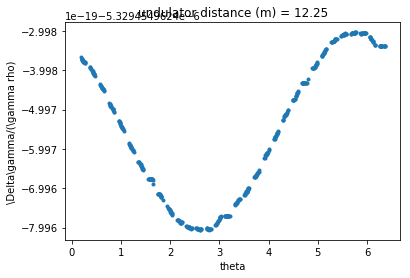

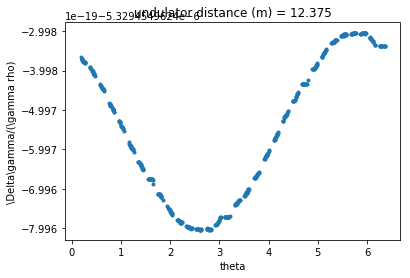

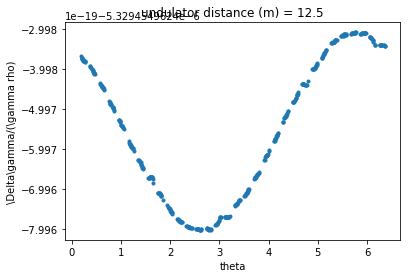

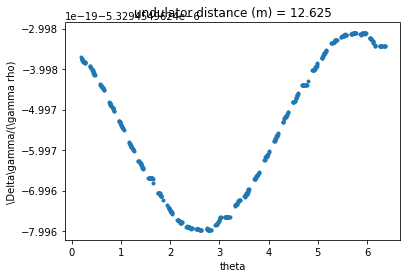

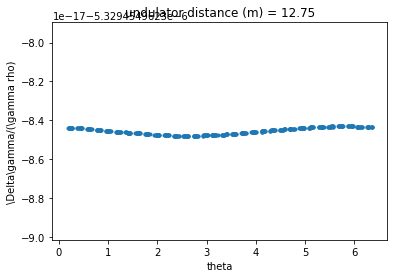

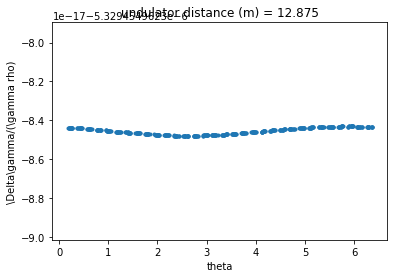

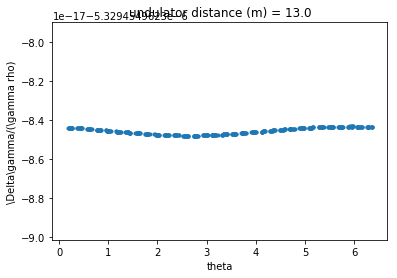

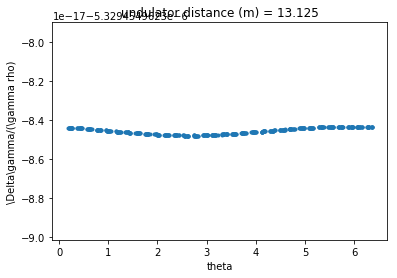

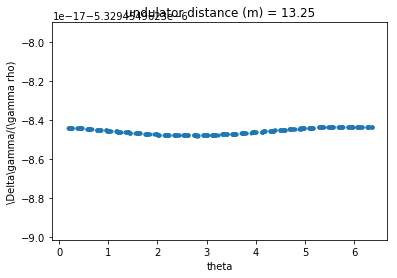

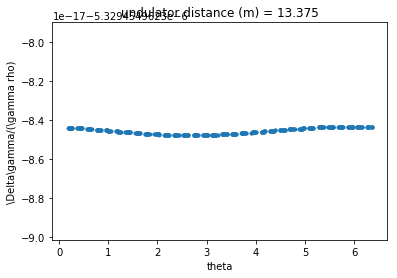

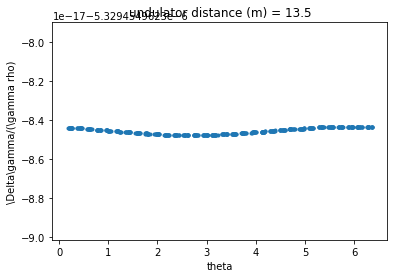

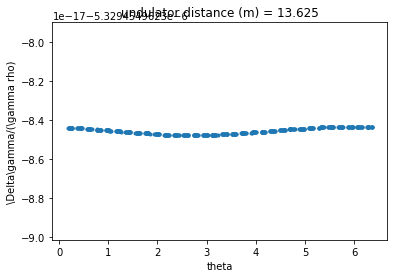

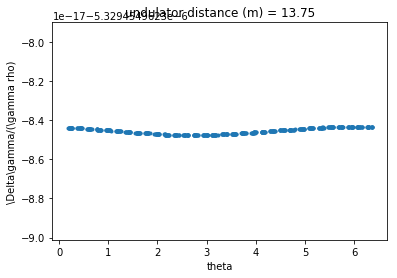

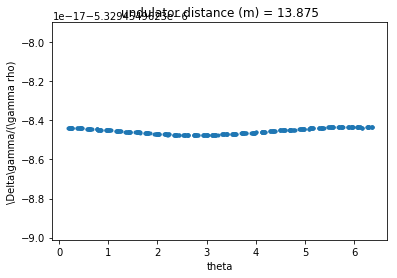

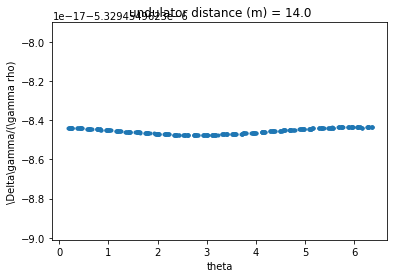

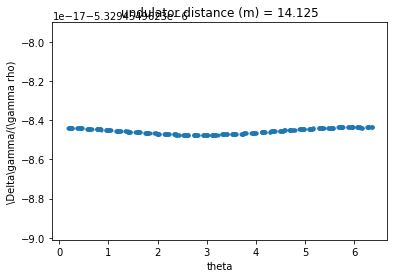

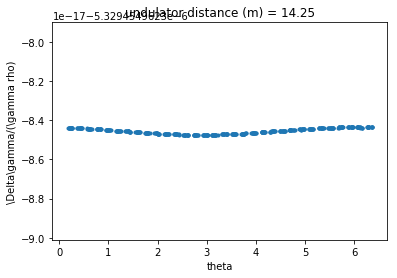

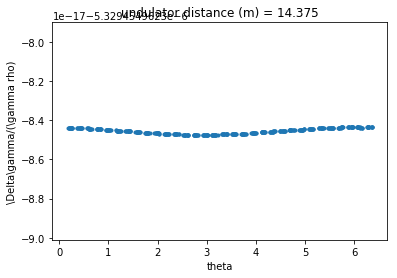

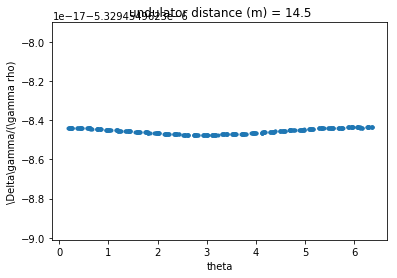

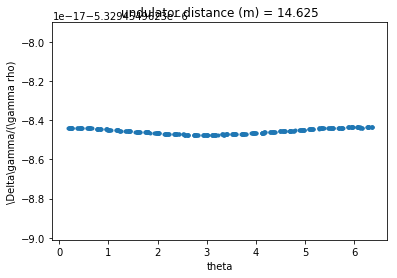

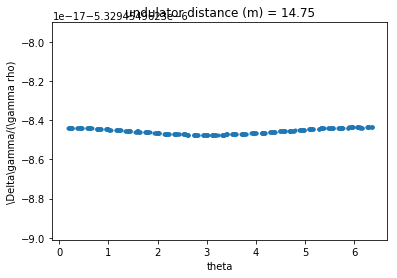

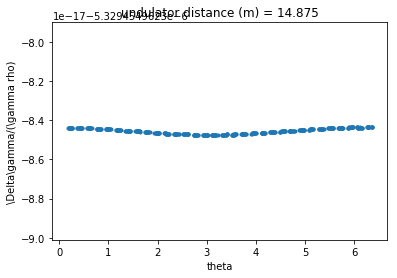

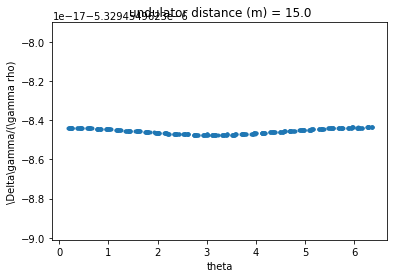

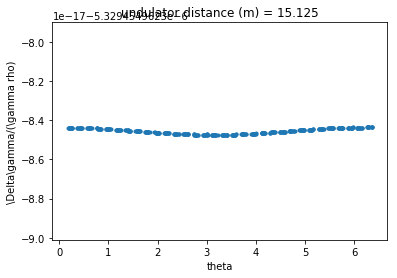

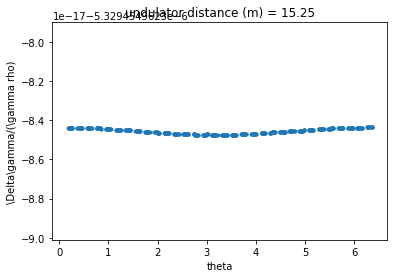

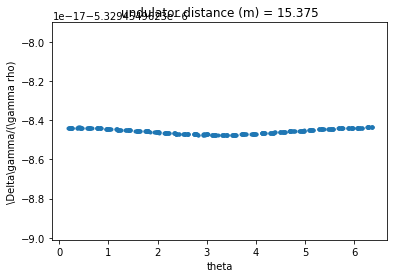

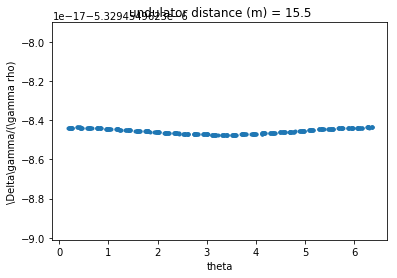

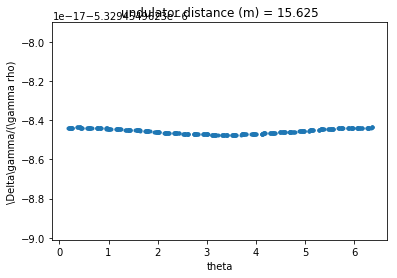

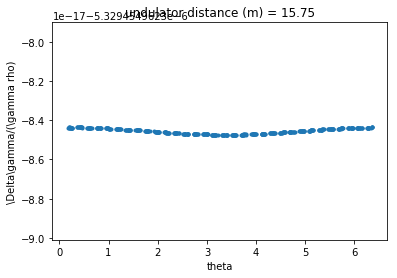

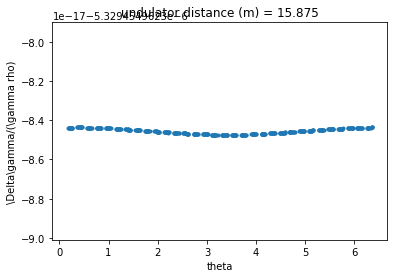

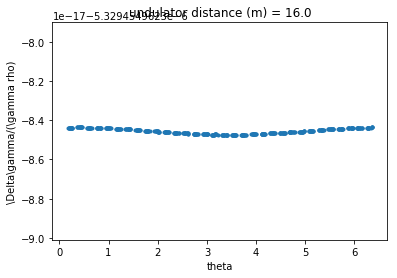

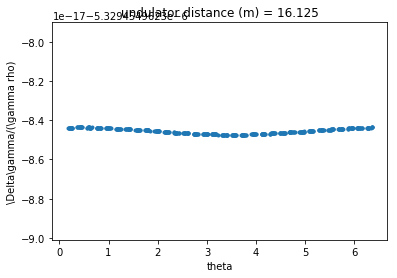

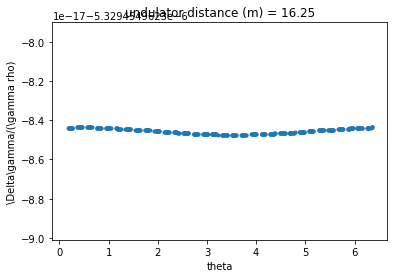

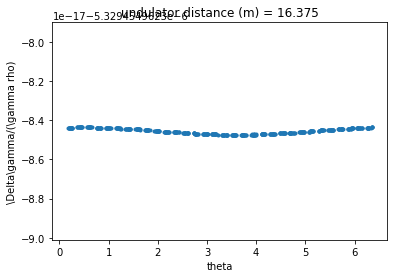

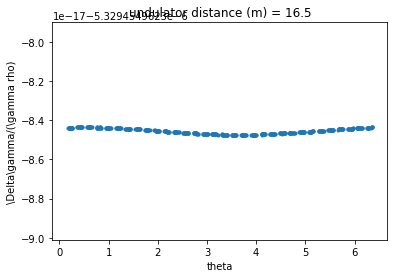

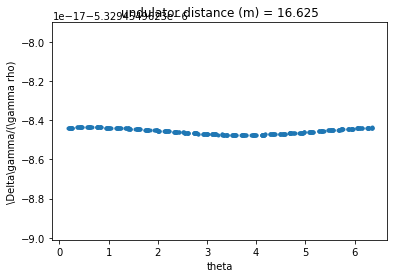

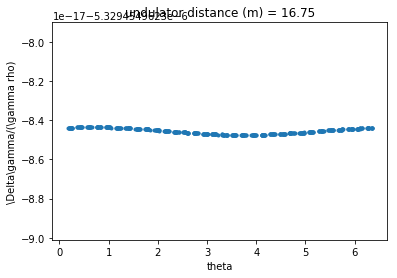

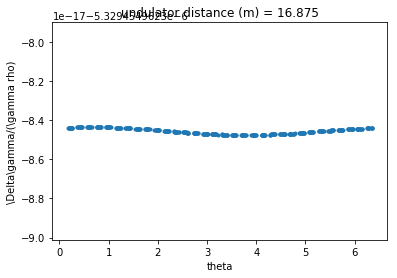

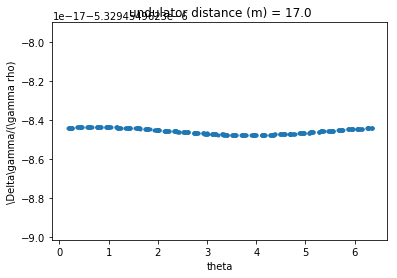

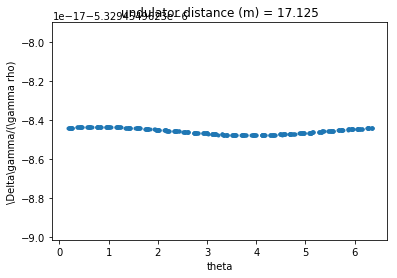

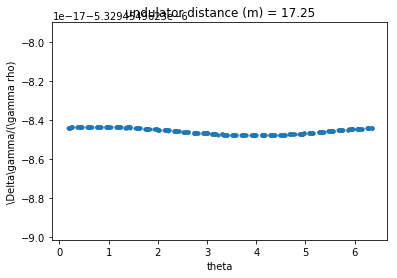

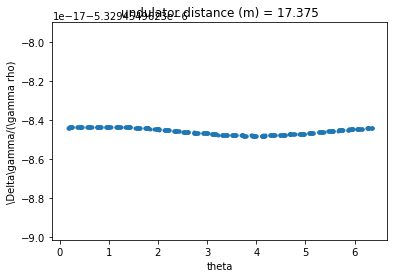

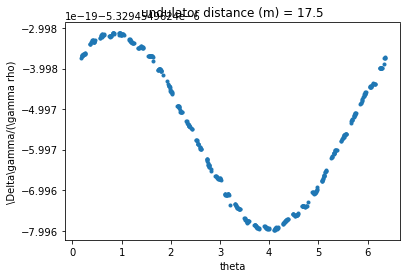

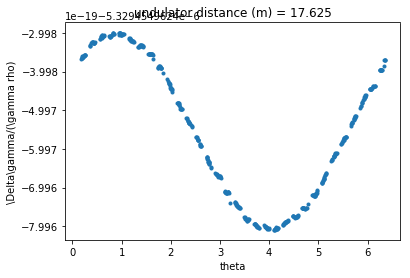

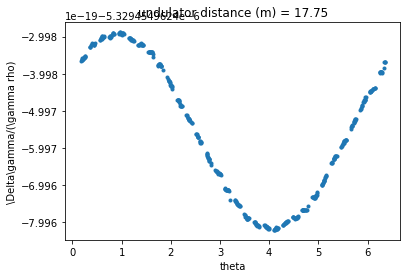

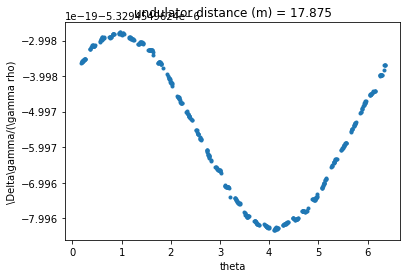

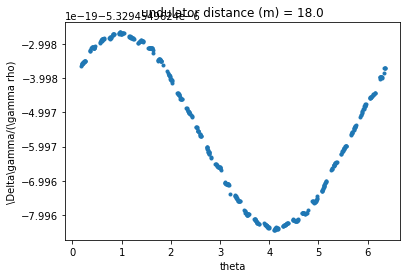

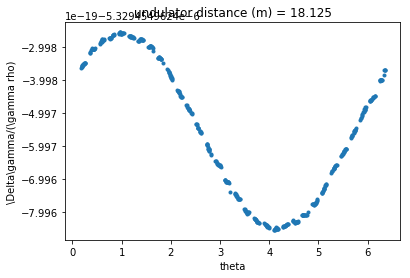

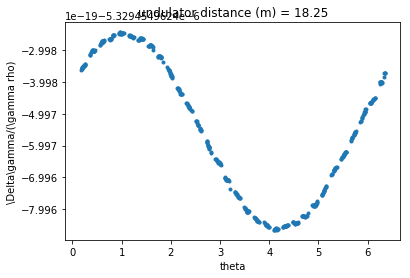

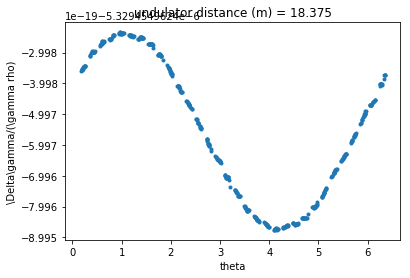

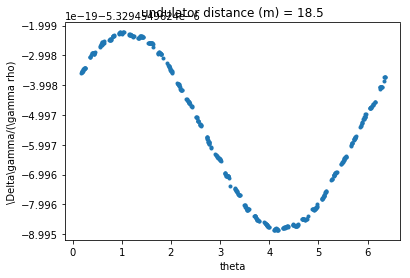

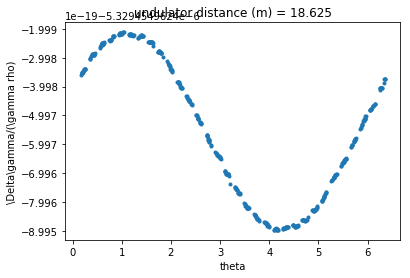

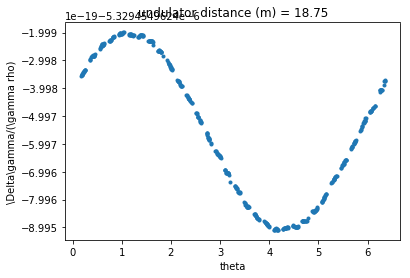

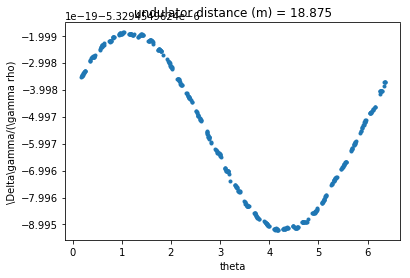

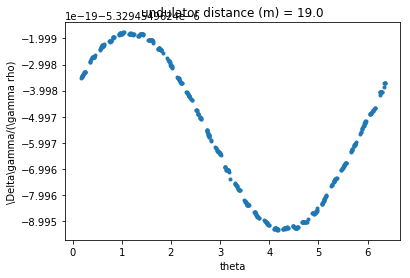

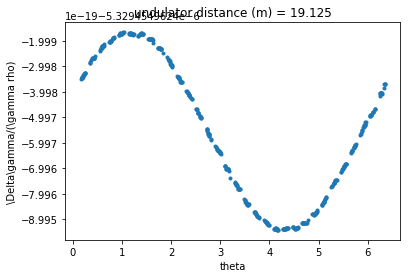

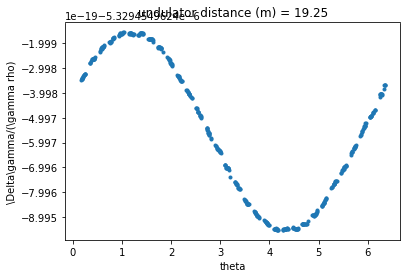

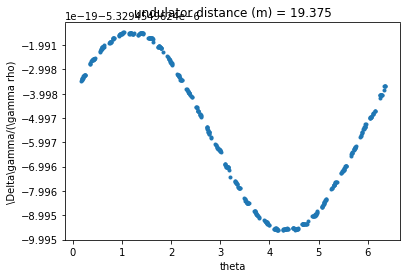

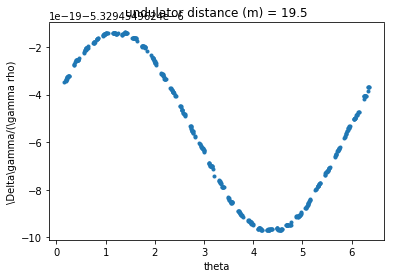

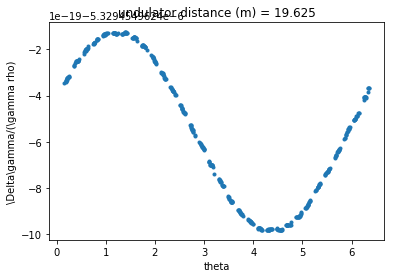

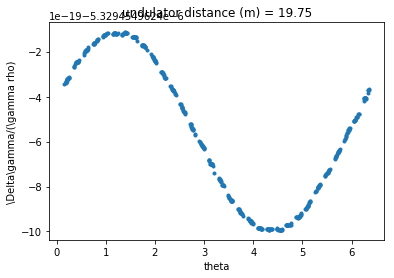

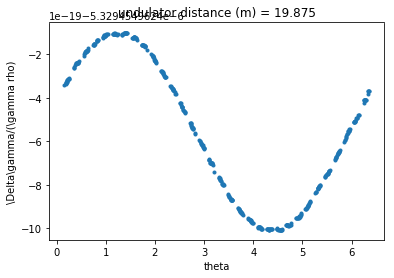

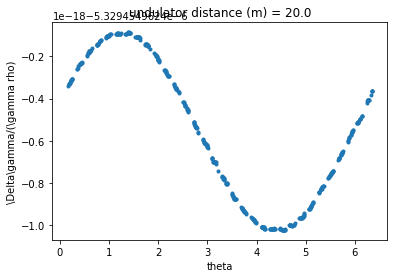

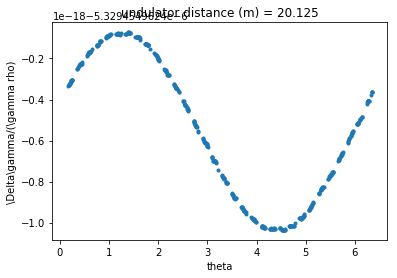

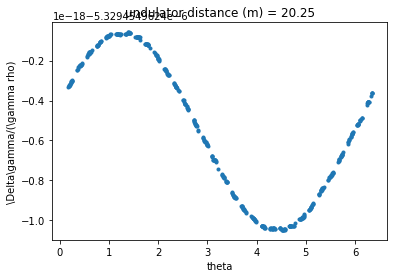

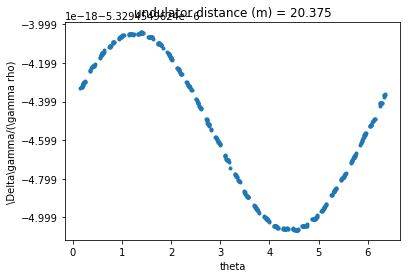

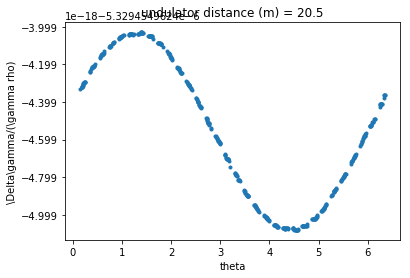

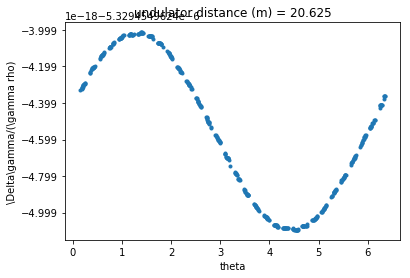

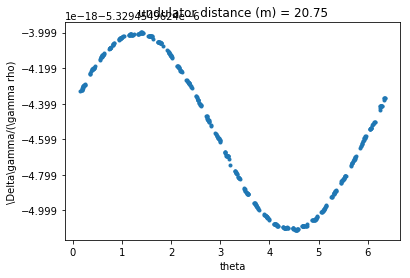

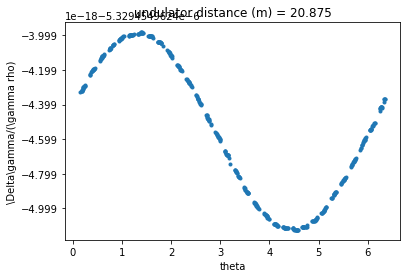

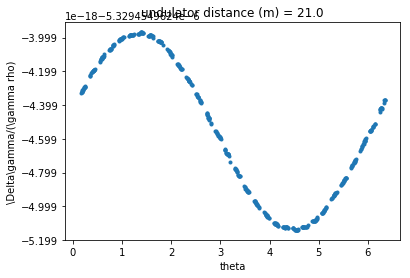

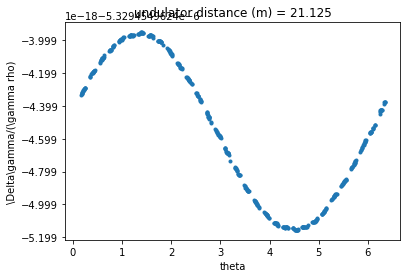

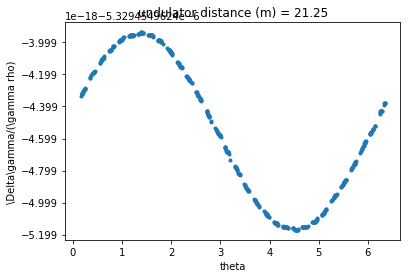

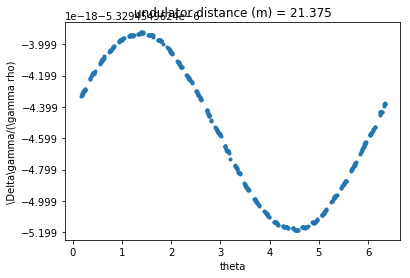

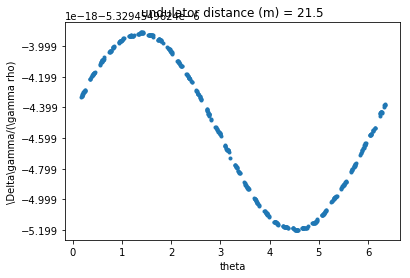

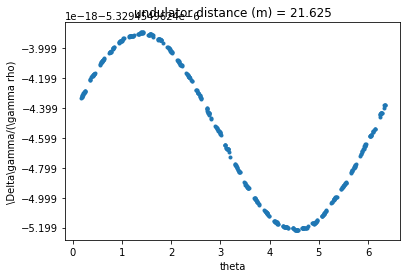

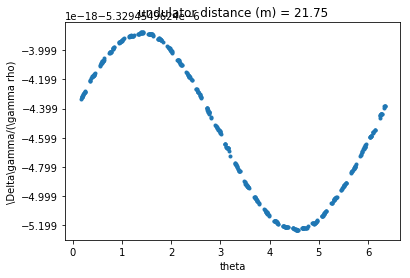

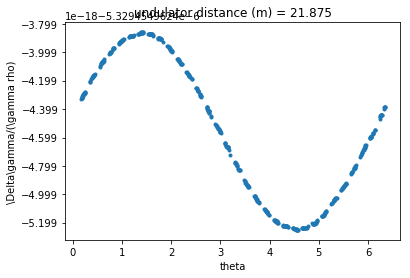

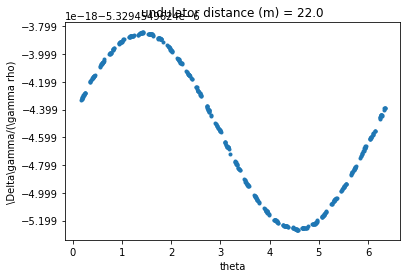

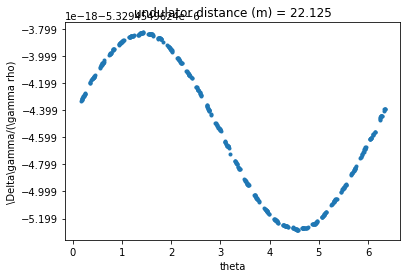

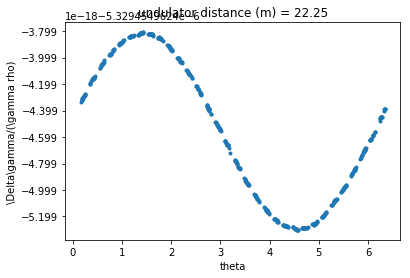

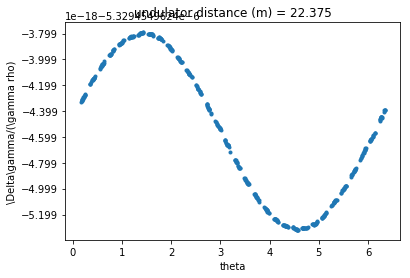

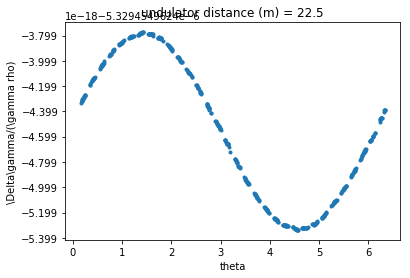

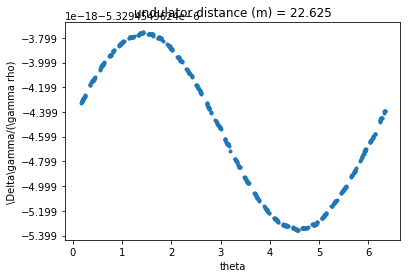

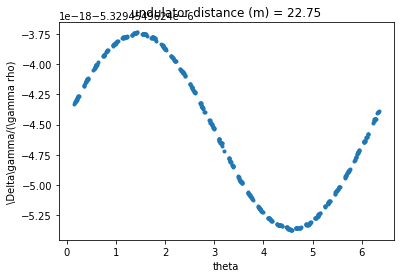

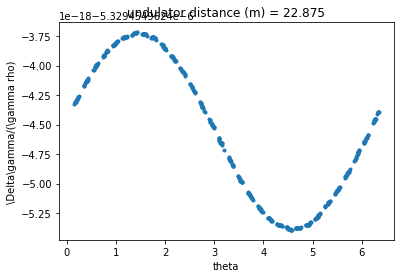

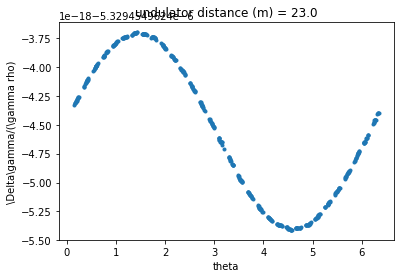

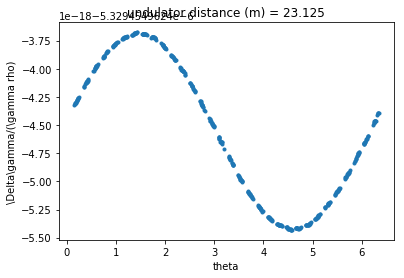

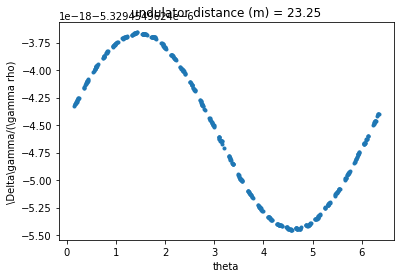

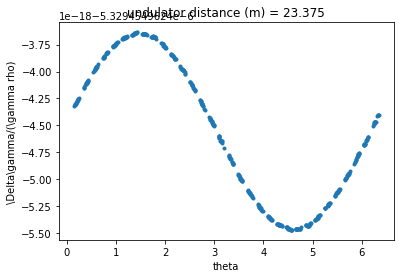

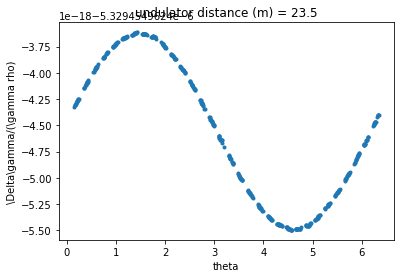

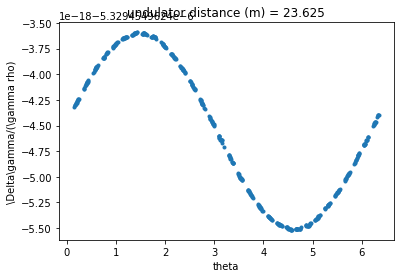

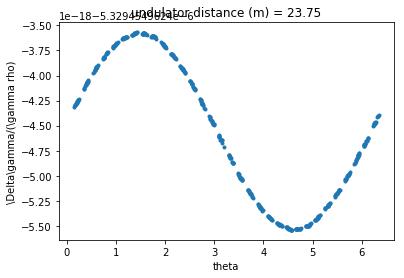

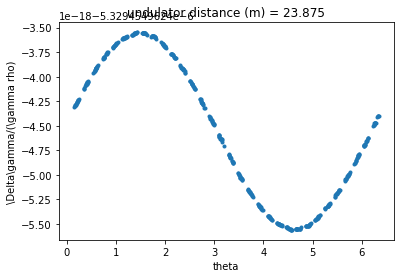

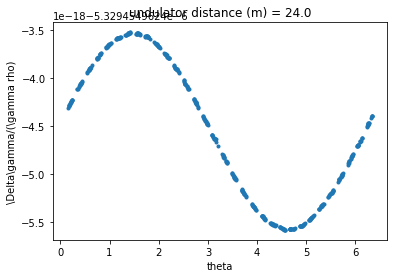

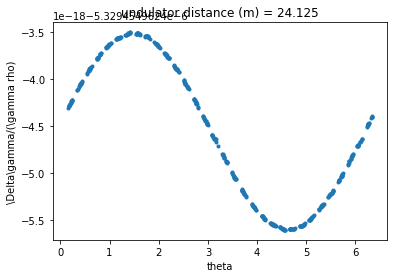

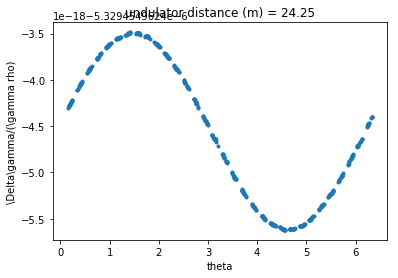

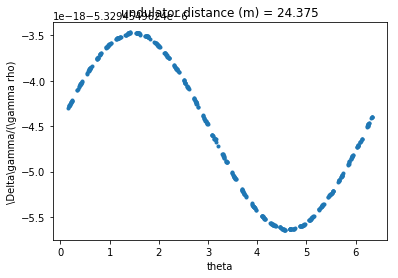

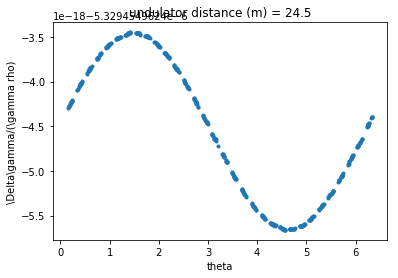

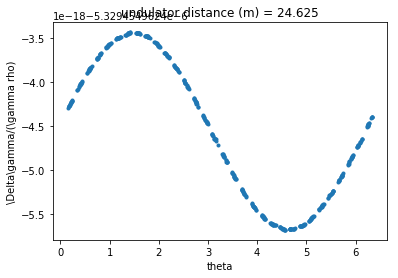

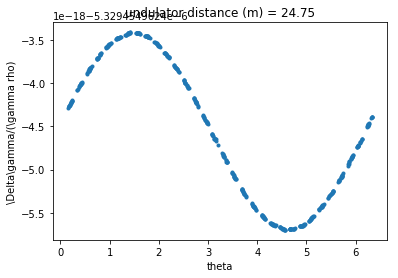

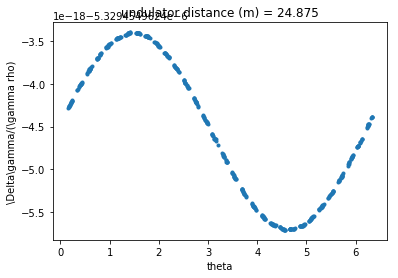

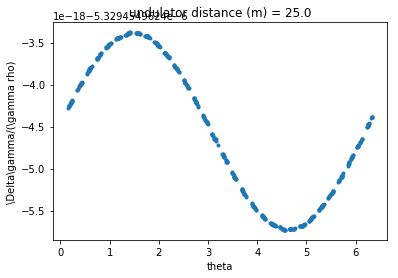

In [22]:
if iopt == 5:
    sase1d.plot_log_power_z(history)
    sase1d.plot_power_s(history)
    sase1d.plot_phase_space(history)
else:
    sase1d.plot_log_power_z(history)
    sase1d.plot_phase_space(history)

In [23]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,gam_out)

0
[-25.13274123 -24.88141382 -24.6300864  -24.37875899 -24.12743158
 -23.87610417 -23.62477675 -23.37344934 -23.12212193 -22.87079452
 -22.61946711 -22.36813969 -22.11681228 -21.86548487 -21.61415746
 -21.36283004 -21.11150263 -20.86017522 -20.60884781 -20.3575204
 -20.10619298 -19.85486557 -19.60353816 -19.35221075 -19.10088333
 -18.84955592 -18.59822851 -18.3469011  -18.09557368 -17.84424627
 -17.59291886 -17.34159145 -17.09026404 -16.83893662 -16.58760921
 -16.3362818  -16.08495439 -15.83362697 -15.58229956 -15.33097215
 -15.07964474 -14.82831732 -14.57698991 -14.3256625  -14.07433509
 -13.82300768 -13.57168026 -13.32035285 -13.06902544 -12.81769803
 -12.56637061 -12.3150432  -12.06371579 -11.81238838 -11.56106097
 -11.30973355 -11.05840614 -10.80707873 -10.55575132 -10.3044239
 -10.05309649  -9.80176908  -9.55044167  -9.29911425  -9.04778684
  -8.79645943  -8.54513202  -8.29380461  -8.04247719  -7.79114978
  -7.53982237  -7.28849496  -7.03716754  -6.78584013  -6.53451272
  -6.28318